## Import libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [37]:
train_link='https://raw.githubusercontent.com/duonghung86/Titanic-machine-learning/master/train.csv'
test_link='https://raw.githubusercontent.com/duonghung86/Titanic-machine-learning/master/test.csv'
train = pd.read_csv(train_link)
test = pd.read_csv(test_link)

train.head()
#print(test.head())    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data epxloration

Name of all features: 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


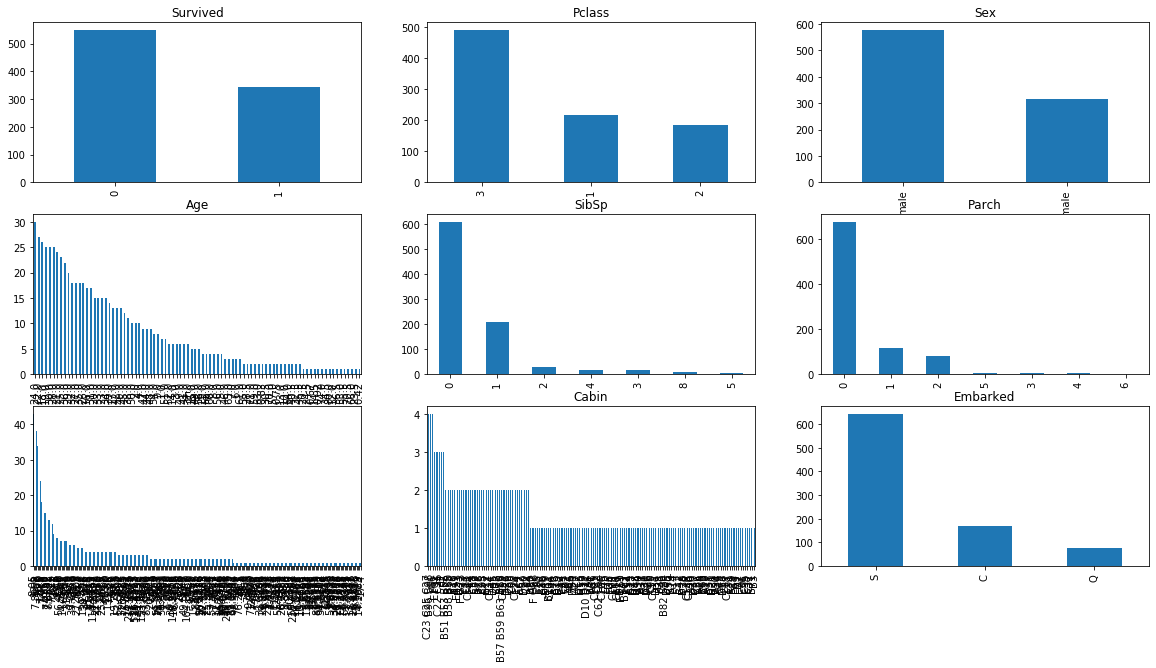

In [38]:
feats=list(train.columns)
print('Name of all features: \n',feats)
#remove unwanted features
feats.remove('PassengerId')
feats.remove('Name')
feats.remove('Ticket')
plt.figure(figsize=(20,10))
#train.isnull()
i=1
for feat in feats:
    plt.subplot(3,3,i)
    train[feat].value_counts().plot(kind='bar',title=feat)
    i+=1

In [39]:
print('Features that contains missing data:')
for feat in feats:
    if train[feat].isnull().any():
        print(feat)

Features that contains missing data:
Age
Cabin
Embarked


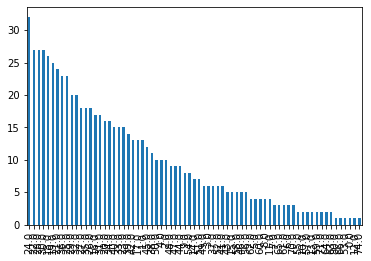

In [40]:
age=round(train['Age'])
age.value_counts().plot(kind='bar')

#plt.hist(train['Age'])

## Data organization

## Model building 


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
y=train.Survived
X=train[['Pclass','SibSp','Parch']]
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628757
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.056     
Dependent Variable: Survived         AIC:              1126.4441 
Date:               2019-10-31 20:24 BIC:              1140.8211 
No. Observations:   891              Log-Likelihood:   -560.22   
Df Model:           2                LL-Null:          -593.33   
Df Residuals:       888              LLR p-value:      4.1923e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    -0.3222     0.0343   -9.3803   0.0000   -0.3895   -0.2549
SibSp     -0.0865     0.0726   -1.1925   0.2331   -0.2287 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


## Evaluation

In [0]:
#For now, I delete all the missing data
#train.dropna(inplace=True)
#train.shape
#plt.figure(figsize=(20,10))
#i=1
#for feat in feats:
#    plt.subplot(3,3,i)
#    train[feat].value_counts().plot(kind='bar',title=feat)
#    i+=1